# Homework 3: Ising Model

I suggest that you create 3 functions:
1. `normallattice`: create $N\times M$ lattice with uniform spin values
1. `randomlattice`: create $N\times M$ lattice with random spin values
1. `plotlattice`: plot an image of the lattice with a colour code for the spin

## Exercise 1

In [1]:
# Import the usual numpy and matplotlib libraries for numerical operations and plotting
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rng
import random
from statistics import mean 

In [2]:
# Uniform Lattice creation
def normallattice(N, M, value=0):
    '''
    This function returns an N (rows) x M (columns) lattice with identical values value
    '''
    return np.full((N, M), value)

In [3]:
# Random Lattice creation
def randomlattice(N, M):
    '''
    This function returns an N (rows) x M (columns) lattice with randomized spin values -1 or 1
    '''
    return rng.choice((-1, 1), (N, M))

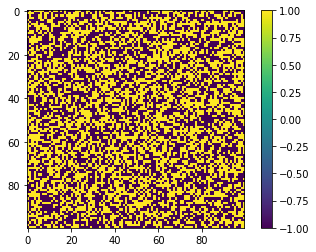

In [4]:
# Draw your lattice
def plotlattice(lattice):
    """
    Create a visualization of a lattice 
    """
    plt.imshow(lattice)
    plt.colorbar()
    plt.show()
    

plotlattice(randomlattice(100,100))

### Exercise 2: Randomly choose & flip a lattice point <a class="anchor" name="ex2"></a>
We now need two functions:
1. a function to randomly select one of the particles in the lattice and return its coordinates $(i,j)$. 
1. a function to flip the spin of the particle pointed by the $(i,j)$ indices and return the new lattice state.

In [28]:
#Returns coordinates for a random particle
def RandomParticle(lattice):
    N,M=np.shape(lattice)

    i=random.randint(0,N-1)
    j=random.randint(0,M-1)
    return i,j


#Testing RandomParticle function
print(RandomParticle(randomlattice(100,200)))

(6, 130)


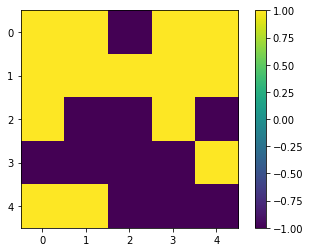

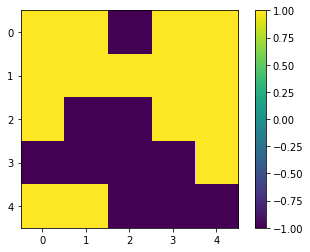

In [6]:
#Takes coordinates for a lattice position and flips the spin of that particle, then returns the new lattice
def FlipParticle(lattice,i,j):
    lattice[i][j]=lattice[i][j]*(-1)
    return lattice


#Testing FlipParticle function
latticex=randomlattice(5,5)
i,j=RandomParticle(latticex)
plotlattice(FlipParticle(latticex, i,j))
plotlattice(FlipParticle(latticex,i,j))
    

### Exercise 3: Nearest neighbors <a class="anchor" name="ex3"></a>
A key element of this model is calculating the combined spin state of the 4 nearest neighbors around a given lattice point $(i,j)$.

Write a function to return the combined spin state and which respects periodic boundary conditions.

I suggest that you develop your code with a *small*, say, 5x5 lattice. Once you have convinced yourself that this functions correctly, you can move to the next item and also expand your lattice (no use debugging a big model that takes lots of time to evaluate).

Neighborsum (0,0)= 0
[[ 1  1 -1 -1 -1  1 -1  1 -1 -1]
 [ 1  1 -1  1  1 -1 -1 -1  1  1]
 [-1  1 -1  1  1  1  1 -1  1 -1]
 [-1  1 -1  1 -1 -1 -1 -1  1 -1]
 [ 1 -1  1  1  1  1 -1  1  1 -1]
 [ 1  1 -1  1  1  1 -1  1  1 -1]
 [ 1  1  1  1 -1 -1 -1 -1  1  1]
 [-1  1  1  1  1  1 -1  1 -1  1]
 [ 1  1  1  1 -1  1  1  1 -1  1]
 [-1  1 -1  1 -1  1 -1  1 -1 -1]]
Particle spin 1


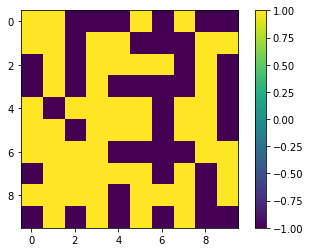

In [30]:
def neighborsSum(lattice, i, j):
    '''
    Sums the spins of the lattice points at four neighbor sites to site (i,j).
        Takes into account the size of the lattice in 
        terms of number of rows (i) and columns (j),
        thus implementing periodic boundary conditions.
    '''
    
    latticesum = 0
    N,M=np.shape(lattice)
    
    #south neighbor
    if (i+1)>(N-1):
        latticesum+=lattice[0][j]
    else:
        latticesum+=lattice[i+1][j]

    
    #north neighbor
    if (i-1)<0:
        latticesum+=lattice[N-1][j]
    else:
        latticesum+=lattice[i-1][j]

    #west neighbor
    if (j-1)<0:
        latticesum+=lattice[i][M-1]
    else :
        latticesum+=lattice[i][j-1]
      
    #east neighbor
    if (j+1)>(M-1):
        latticesum+=lattice[i][0]
    else:
        latticesum+=lattice[i][j+1]

    
    return latticesum

#testing the function NeighborsSum
ex=randomlattice(10,10)
print('Neighborsum (0,0)=', neighborsSum(ex,0,0))
print(ex)
print('Particle spin',ex[0][0])
plotlattice(ex)

### Exercise 4: Calculating the energy of the lattice <a class="anchor" name="ex4"></a>
The local energy is defined as the total interaction energy between the selected particle and its immediate neighbours. 

1. write a function to calculate the energy associated with a given site (e.g. `localenergy`)
1. also write a function to calculate the total energy of the lattice by summing over the energies of all sites (e.g. `totalenergy`)

Again, I suggest that you perform some tests with a simple 5x5 lattice, for example:
1. Compare the energy of the lattice for different configuations of spins. 
1. What is the total energy of the system when all spins point up or down or randomly? 

You might also consider using the `numpy` function `roll`: 
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.roll.html

This can provide an alternative method for performing sums over the entire lattice, but I leave it up to you to figure it out!

In [8]:
#Local energy function that does NOT divide the interaction energy by 2
#this local energy is used to calculate difference in E (\delta E) before and after spin flip

def localenergy_diff(lattice, J, B, i, j):
    
    #Magnetization energy
    E_mag = (-1)*(B) * lattice[i][j]
    
    #Interaction energy
    E_int = (-1)*(J)*lattice[i][j]*(neighborsSum(lattice,i,j))
    
    #Total energy
    E= E_mag + E_int
    
    return E

In [9]:
#Local energy function used to calculate total energy
#this local energy DOES divide interaction energy by 2 (so interaction energy is not double counted after summing up 
# over all particle local energies)

def localenergy_total(lattice, J, B, i, j):   
    
    #Magnetization energy
    E_mag = -B * lattice[i][j]
    
    #Interaction Energy (DIVIDED BY 2)
    E_int = -J*(0.5)*lattice[i][j]*(neighborsSum(lattice,i,j))
    
    #Total energy
    E= E_mag + E_int
    
    return E

In [10]:
#Total energy function: sums over all spin locations using localenergy_total

def totalenergy(lattice, J, B):
    
    #initialize size (N,M) and energy (E) variables 
    
    N,M=np.shape(lattice)
    E=0  
    
    #Loops through all positions in lattice
    for i in range(N):
        for j in range(M):
            E+=localenergy_total(lattice, J, B, i, j)
            
    return E


[[ 1 -1 -1]
 [-1  1  1]
 [ 1  1 -1]]
1
total 6.0


NameError: name 'localenergy' is not defined

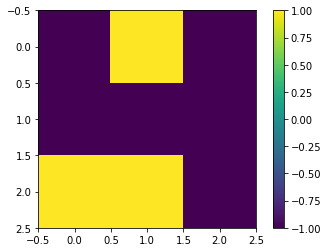

[[-1  1 -1]
 [-1 -1 -1]
 [ 1  1 -1]]

Spin at location (1,1)= -1
Initial total energy= -2.0
Initial local energy (1,1)= 0.0
Flip spin
Spin at location (1,1)= 1
Final total energy= -2.0
Final local energy (1,1)= 0.0


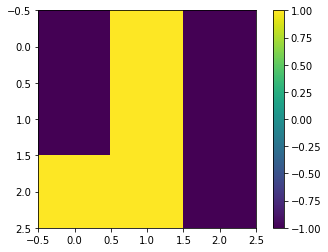

[[-1  1 -1]
 [-1  1 -1]
 [ 1  1 -1]]


In [38]:
#Testing totalenergy and localenergy_total functions 
#localenergy_total DOES divide interaction energy by 2

l=randomlattice(3,3)
J=1
B=0
plotlattice(l)
print(l)
print()
print('Spin at location (1,1)=',l[1][1])
print('Initial total energy=',totalenergy(l,J,B))
print('Initial local energy (1,1)=',localenergy_total(l,J,B,1,1)) #localenergy_total used (interaction energy /2)
print('Flip spin')
FlipParticle(l,1,1)
print('Spin at location (1,1)=',l[1][1])
print('Final total energy=',totalenergy(l,J,B))
print('Final local energy (1,1)=',localenergy_total(l,J,B,1,1))
plotlattice(l)
print(l)

In [40]:
#Testing localenergy_diff (difference in initial and final total energy should be (-2)*localenergy_diff(i,j)
#where localenergy_diff(i,j) is the local energy of the particle before it is flipped

#Initializing J, B (external magnetic field), lattice, random particle position
J = 1
B = 0
l=randomlattice(5,5)
i,j=RandomParticle(l)

total1 = totalenergy(l,J,B)
local1 = localenergy_diff(l,J,B,i,j)
print(l)
print('Total energy = ',total1)
print('Local energy at ('+str(i)+','+str(j)+') = ',local1)

print('Flipping the spin at ('+str(i)+','+str(j)+')')
FlipParticle(l,i,j)

total2 = totalenergy(l,J,B)
local2 = localenergy_diff(l,J,B,i,j)
print(l)
print('Total energy = ',total2)
print('Local energy at ('+str(i)+','+str(j)+') = ',local2)

deltaE_total = total2 - total1
deltaE_local = local2 - local1
print('deltaE_total = ', deltaE_total)
print('deltaE_local = ', deltaE_local)

[[-1  1  1 -1  1]
 [ 1 -1  1  1  1]
 [ 1 -1  1 -1 -1]
 [ 1  1 -1  1 -1]
 [-1 -1 -1 -1  1]]
Total energy =  10.0
Local energy at (3,1) =  2
Flipping the spin at (3,1)
[[-1  1  1 -1  1]
 [ 1 -1  1  1  1]
 [ 1 -1  1 -1 -1]
 [ 1 -1 -1  1 -1]
 [-1 -1 -1 -1  1]]
Total energy =  6.0
Local energy at (3,1) =  -2
deltaE_total =  -4.0
deltaE_local =  -4


### Exercise 5: Calculate the magnetisation of the lattice <a class="anchor" name="ex5"></a>
Implement functions to calculate 

1. The total magnetisation of the lattice
1. The magnetisation per spin

Recall that the magnetization $M$ is defined by

$$M = \sum_i \spini$$

and the magnetization per spin, $m$, is defined by 

$$m = M/N$$

Again, I suggest that you perform some tests with a simple 5x5 lattice first, for example:
1. What will be the value of $m$ if all spins are aligned up? what if all the spins are aligned down? What if half of the spins are up and half are down?
1. Set an initial condition with $m = 1.0$, that is all the spins point up. Try to perturb a few particles and recalculate the magnetisation

In [41]:
#Total magnetization
def totalmagnetization(lattice):

    return np.sum(lattice)
    

#Divide total magnetization by number of spins
def magnetizationPerSpin(lattice):
    
    N, M=np.shape(lattice)
    
    return totalmagnetization(lattice)/(N*M)


#testing magnetization functions
l=normallattice(6,6,1)
print(l)
print('magnetisation per spin =', magnetizationPerSpin(l))
print('total magnetisation =', totalmagnetization(l))
print('\nflip a third of the spins')
l[:2,:]*=-1
print(l)
print('magnetisation per spin =', magnetizationPerSpin(l))
print('total magnetisation =', totalmagnetization(l))
print('\nflip half of the total spins')
l[:3,:]=-1
print(l)
print('magnetisation per spin =', magnetizationPerSpin(l))
print('total magnetisation =', totalmagnetization(l))

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]]
magnetisation per spin = 1.0
total magnetisation = 36

flip a third of the spins
[[-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]]
magnetisation per spin = 0.3333333333333333
total magnetisation = 12

flip half of the total spins
[[-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]
 [ 1  1  1  1  1  1]]
magnetisation per spin = 0.0
total magnetisation = 0


### Exercise 6: Implement the Metropolis algorithm <a class="anchor" name="ex6"></a>
At this point in your the code you should have all the nesscessary functions properly implemented and the thermodynamic simulation of the system can take place. 

1. Write out the pseudocode that your algorithm will implement. What appears below is a starting point, but your pseudocode should go into a least one more level of detail beyond this.
1. Initialize the configuration
1. Calculate the energy change $\Delta E$ of the system if one spin of the lattice is flipped
1. If $\Delta E$  is negative, then select to flip the spin and go to step 7, otherwise ....
1. Generate a random number $r$ such that $0 < r < 1$, with uniform probability
1. If this number is less than the probability of $\Delta E$ i.e. $r < e^{-\Delta E/\k_B T}$, then flip the spin. 
1. Choose another spin of the lattice at random and repeat steps 3 to 7 a chosen number of times ($N_{MCS}$)

The goal should be to use the functions that you have defined in the previous steps to make a new function that runs the Metropolis algorithm for a single time step step. The energy difference before flip and after flip can be calculated by simply looking at the current local energy at $(i,j)$, $\Delta E = -2 E_\text{local}(i,j)$. This function should return the change in energy and the change in magnetization. 




My Pseudocode:
1. Initialize the configuration: Create a random lattice with specified dimensions randomlattice(N,M)
1. Calculate the energy change $\Delta E$ of the system if one spin of the lattice is flipped: Calculate $\Delta E$ by finding a random particle (use randint()), then localenergy() for (i,j), $\Delta E$=-2localenergy(i,j)  

1. If $\Delta E$  is negative, then select to flip the spin and go to step 7, otherwise ....
1. Generate a random number $r$ such that $0 < r < 1$, with uniform probability: use random.random()
1. If this number is less than the probability of $\Delta E$ i.e. $r < e^{-\Delta E/\kB T}$, then flip the spin: 
calculate $r < e^{-\Delta E/\kB T}$, if r< probability of Delta E, the flip the spin
1. Choose another spin of the lattice at random and repeat steps 3 to 7 a chosen number of times ($N_{MCS}$)

In [16]:
#Metropolis Algorithm implementation
#Takes in lattice, J (interaction coupling strength), B (external magnetic field), T (temperature),
#count (iterations metropolisAlgorithm_new will complete)

def metropolisAlgorithm_new(latt, J, B, T, count):
        
        N,M=np.shape(latt)
        
        for k in range(count):
            i=random.randint(0,N-1)
            j=random.randint(0,M-1)

            diffE=(-2*localenergy_diff(latt,J,B,i,j)) #using localenergy_diff so interaction coupling is NOT /2
        
            kb = 1 # numbers will be nicer: we know the Curie temperature is ~2.2 for kb = 1
           
            if diffE < 0:
                latt=FlipParticle(latt,i,j)
            elif random.random()<(np.exp(-diffE/(kb*T))):
                latt=FlipParticle(latt,i,j)
              
        return latt
    
    
    

In [17]:
#Jan: Testing the algorithm. We run it for a few steps, as it's not unreasonable that it won't change after just one step.
J = 1
B = 0
T = 1
count = 100
lattice=randomlattice(5,5)
print(lattice)
print('initial energy', totalenergy(lattice,J,B))
print('run metropolis algorithm')
lattice=metropolisAlgorithm_new(lattice,J,B,T,count)
print(lattice)
print('final energy', totalenergy(lattice,J,B))

[[-1  1 -1  1  1]
 [ 1  1  1 -1 -1]
 [-1  1 -1  1  1]
 [ 1  1  1  1  1]
 [ 1  1  1  1 -1]]
initial energy 2.0
run metropolis algorithm
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
final energy -50.0


### Exercise 7: Perform measurements <a class="anchor" name="ex7"></a>
Calculate the average magnetisation, average energy, and specific heat of the equilibrated system. If you perform many simulations at different temperatures, you should be in a position to observe phase transitions and measure the transition or Curie temperature, $kT_c$. 

You must be careful, however. For these observables -- average energy, magnetization, and specific heat -- you will need to first iterate over `tEq` steps to reach an equilibrium state. Then, once you've established the time it takes for the system to reach an equilibrium state, you'll need to iterate over an additional `Nsteps`. During these additional `Nsteps` beyond the time at which you've established that equilibrium has been reach, you should store $E$, $M$, and $C$ in an array so that they can be averaged over time (i.e. averaged over the additional `Nsteps`).

Initial total energy= -8.0
Initial state of lattice:


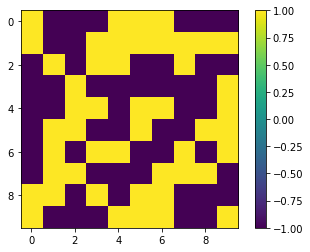

Final total energy= -200.0
Final state of lattice:


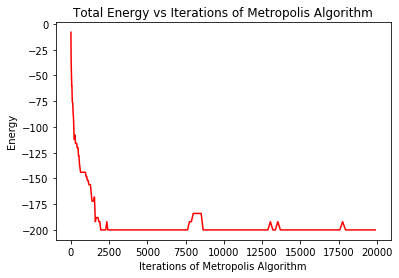

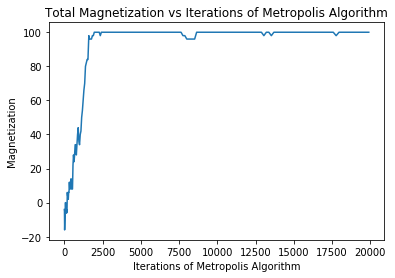

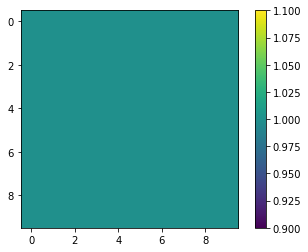

Average energy= -200.0
Average magnetization= 100


In [52]:
# Jan: Let's employ the new metropolis algo. Note that in the old code, the for loop w/ k was not doing anything
#other than running one step repeatedly from the same starting config (there was no use of variable k).

#Initialize variables T (temperature), N (rows in lattice), M(columns in lattice), J (interaction strength coupling),
# B (external magnetic field), E (energy array), Mag (magnetization array), iter (number of iterations metropolisAlg 
# has run)
T=1
N=10
M=10
J=1
B=0
E=[]
Mag=[]
iter=[]


#initial, final and step for the range function when calling metropolis algorithm
i=1 #initial count
f=200 #final count
step=1 # Jan: bad things seem to happen for step!=1 (this is purely a coding issue, 
#Hey I'll leave it up to you -- it would be nice to be able to use large steps)

#Create random lattice
latt=randomlattice(N,M)

#Initial state of lattice
print('Initial total energy=', totalenergy(latt,J,B))
print('Initial state of lattice:')
plotlattice(latt)

# for loop iterates f-i times 
for k in range(i,f,step):
    metropolisAlgorithm_new(latt,J,B,T,k) #k is the number of times I am telling MetAlg to run
    E.append(totalenergy(latt,J,B)) #append energy after metropolisAlgorithm call
    Mag.append(totalmagnetization(latt)) #append magnetization after metropolisAlgorithm call
    iter.append(k) #number of iterations completed in this loop appended to iter


#Cumulatively sum over iter (since each iteration through the for loop I am telling metropolisAlg to run more
#and more times)
iter=np.cumsum(iter)

#Plot energy and magnetization graphs

#plot Energy vs. Number of iterations of metropolisAlgorithm 
plt.figure()
plt.plot(iter,E,color='red')
plt.title('Total Energy vs Iterations of Metropolis Algorithm')
plt.xlabel('Iterations of Metropolis Algorithm')
plt.ylabel('Energy')


#plot magnetization vs. Number of iterations of metropolisAlgorithm 
plt.figure()
plt.plot(iter, Mag)
plt.title('Total Magnetization vs Iterations of Metropolis Algorithm')
plt.xlabel('Iterations of Metropolis Algorithm')
plt.ylabel('Magnetization')

#Final state of lattice
print('Final total energy=',totalenergy(latt,J,B))
print('Final state of lattice:')
plt.figure()
plotlattice(latt)


#Calculating average energy and magnetization after equilibrium
#For T=1, Energy and Magnetization stabilize after about 2000 iterations
#E[80] is total energy after 3240 iterations of MetropolisAlgorithm
avgE=mean(E[80:100])
avgM=mean(Mag[80:100])


print('Average energy=', avgE)
print('Average magnetization=', avgM)

Slope of above curve/specific heat: 250.0219780242323


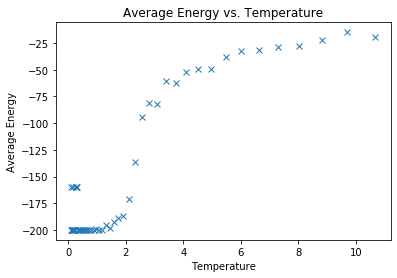

In [53]:
#Average Energy vs Temperature

#Initialize variables 
Earr=[]
T=0.1 #start temperature
Tarr=[]

#Loops throiugh 50 temperatures
for t in range(1,51,1):
    
    latt=randomlattice(N,M) #create a random lattice
    
    Tarr.append(T) #append current temperature for this loop to Tarr 
    
    E=[] #create a new energy array for this loop
    
    metropolisAlgorithm_new(latt,J,B,T,20000) #run metropolisAlgorithm 20 000 times 
    #(the temperature the more iterations are needed for equilibration)
    
    #after 20 000 iterations, we average over the next 1000 energies 
    for i in range(1000):
        metropolisAlgorithm_new(latt,J,B,T,1)
        E.append(totalenergy(latt,J,B))
  
    #Take the average of these last 1000 runs adn append to Earr
    Eavg=mean(E)
    Earr.append(Eavg)
    
    #Multiply temperature by 1.1 for next loop
    T*=1.1

#plot Average Energy vs. Temperature
plt.plot(Tarr,Earr,'x') 
plt.title('Average Energy vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Average Energy')


#calculate slope of this curve
slope=0
length=len(Earr)

#Take slope between each two consecutive points and take the average
for i in range(length-1):
    slope+=np.abs(Earr[i+1]-Earr[i])/(Tarr[i+1]-Tarr[i])

print('Slope of curve/specific heat:',slope/length)
